In [1]:
# importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.datasets import make_regression
# Mean squared error 
from sklearn.metrics import mean_squared_error

In [2]:
fileName = "xid-92685698_2.txt" 
df = pd.read_csv(fileName, delim_whitespace=True) 
df.head()

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2023,1,1,0,26,999,99.0,99.0,1.12,12.50,7.69,269,9999.0,999.0,15.3,999.0,99.0,99.0
1,2023,1,1,0,56,999,99.0,99.0,1.16,11.76,7.34,272,9999.0,999.0,15.3,999.0,99.0,99.0
2,2023,1,1,1,26,999,99.0,99.0,1.20,12.50,7.08,268,9999.0,999.0,15.3,999.0,99.0,99.0
3,2023,1,1,1,56,999,99.0,99.0,1.25,10.53,7.33,268,9999.0,999.0,15.4,999.0,99.0,99.0
4,2023,1,1,2,26,999,99.0,99.0,1.27,10.53,7.57,268,9999.0,999.0,15.5,999.0,99.0,99.0


In [3]:
df_w = df[["DPD","APD","MWD","WTMP","WVHT"]]
df_w.head()

,DPD,APD,MWD,WTMP,WVHT
0,12.50,7.69,269,15.3,1.12
1,11.76,7.34,272,15.3,1.16
2,12.50,7.08,268,15.3,1.20
3,10.53,7.33,268,15.4,1.25
4,10.53,7.57,268,15.5,1.27


In [4]:
xVal = df_w[['DPD','APD','WTMP','MWD']].to_numpy()
yVal = np.array(df_w['WVHT'])

In [5]:
from sklearn.model_selection import train_test_split
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(xVal, yVal, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

1. Fit a boosted regression tree with 25 boosting iterations. Compare with a baseline linear model of your choice. Which model performs best? Report performance on the training, validation, and test dataset.
- Boosted regression tree performs the best with training set performance score being 0.9596514368246951, validation set being 0.9685283945332306 and test set being 0.9808043966329663.

2. What cost function are you using for each model?
- For the baseline model (Linear regression), the cost function is ordinary least square.
- For the boosted regression model, the cost function is mean squared error.


# Baseline Model

In [6]:
lm= linear_model.LinearRegression()
lm.fit(X_train_temp,y_train_temp)
lm_y1 = lm.predict(X_train_temp)
lm_y2 = lm.predict(X_test)
lm_y3 = lm.predict(X_val)
lm_err = mean_squared_error(lm_y1,y_train_temp)
print(mean_squared_error(lm_y1,y_train_temp))
print(mean_squared_error(lm_y2,y_test))
print(mean_squared_error(lm_y3,y_val))
#print(lm.score(X_train_temp, y_train_temp))

1.5715414696434409
4.1308524549426044
1.9538000653381657


# XGBoost regressor

In [7]:
import xgboost as xgb

In [9]:
xgbr = xgb.XGBRegressor(n_estimators = 25, learning_rate = 0.1)
xgbr.fit(X_train_temp, y_train_temp)
ytpred = xgbr.predict(X_train_temp)
yvpred = xgbr.predict(X_val)
ytepred = xgbr.predict(X_test)
score1 = xgbr.score(X_train_temp, y_train_temp)
score2 = xgbr.score(X_val,y_val)
score3 = xgbr.score(X_test, y_test)
print(mean_squared_error(y_train_temp, ytpred), "mse for training set | score: ", score1)
print(mean_squared_error(y_val, yvpred), "mse for validation set | score: ", score2)
print(mean_squared_error(y_test, ytepred), "mse for testing set | score: ", score3)

0.1512226603881528 mse for training set | score:  0.9596514368246951
0.18297277282434418 mse for validation set | score:  0.9685283945332306
0.3244456606262318 mse for testing set | score:  0.9808043966329663


3. What(if any) hyper parameters did you optimize, and why?
- I changed the learning rate to 0.3 from 0.1 and max_depth to 10 from default to check if the model improves its performance. The model did perform better, the mean squared errors reduced when compared with the predicted values and the performance scores also became high.

In [20]:
xgbr = xgb.XGBRegressor(n_estimators = 25, learning_rate = 0.3, max_depth = 10)
xgbr.fit(X_train_temp, y_train_temp)
ytpred = xgbr.predict(X_train_temp)
yvpred = xgbr.predict(X_val)
ytepred = xgbr.predict(X_test)
score1 = xgbr.score(X_train_temp, y_train_temp)
score2 = xgbr.score(X_val,y_val)
score3 = xgbr.score(X_test, y_test)
print(mean_squared_error(y_train_temp, ytpred), "mse for training set | score: ", score1)
print(mean_squared_error(y_val, yvpred), "mse for validation set | score: ", score2)
print(mean_squared_error(y_test, ytepred), "mse for testing set | score: ", score3)

0.0391905130061932 mse for training set | score:  0.9895433601958581
0.08399572992683087 mse for validation set | score:  0.9855526019945694
0.07299746746388283 mse for testing set | score:  0.9956811552679421


4. Train a boosted regression tree on this prediction task with 2,10,25,50,100, 250, 500, & 1,000 boosting iterations. Plot the training and validation error as a function of number of iterations.

In [10]:
b_iterations = [2,10,25,50,100,250,500,1000]
error1 =[]
for i in b_iterations: 
    xgbr = xgb.XGBRegressor(n_estimators = i, learning_rate = 0.1)
    xgbr.fit(X_train_temp, y_train_temp)
    ypred = xgbr.predict(X_train_temp)
    score = xgbr.score(X_train_temp,y_train_temp)
    err = (mean_squared_error(y_train_temp,ypred))
    error1.append(err)

<Axes: >

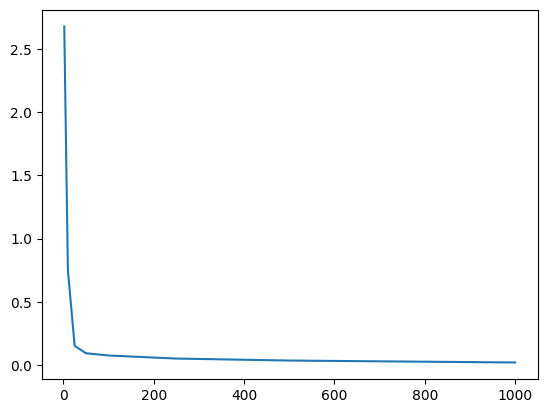

In [11]:
sns.lineplot(x = b_iterations, y = error1)

In [12]:
b_iterations = [2,10,25,50,100,250,500,1000]
error2 =[]
for i in b_iterations: 
    xgbr = xgb.XGBRegressor(n_estimators = i, learning_rate = 0.1)
    xgbr.fit(X_train_temp, y_train_temp)
    ypred = xgbr.predict(X_val)
    score = xgbr.score(X_val,y_val)
    err = (mean_squared_error(y_val,ypred))
    error2.append(err)

<Axes: >

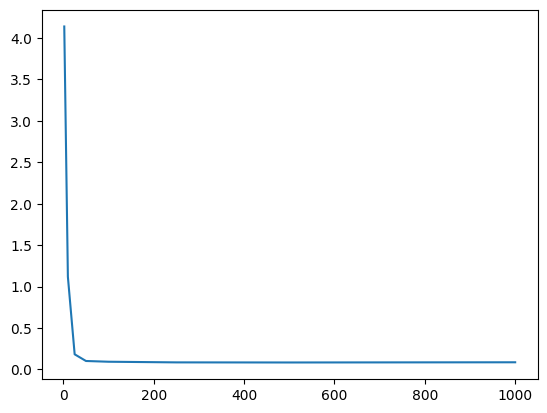

In [13]:
sns.lineplot(x = b_iterations, y = error2)

In [14]:
b_iterations = [2,10,25,50,100,250,500,1000]
error3 =[]
for i in b_iterations: 
    xgbr = xgb.XGBRegressor(n_estimators = i, learning_rate = 0.1)
    xgbr.fit(X_train_temp, y_train_temp)
    ypred = xgbr.predict(X_test)
    score = xgbr.score(X_test,y_test)
    err = (mean_squared_error(y_test,ypred))
    error3.append(err)

<Axes: >

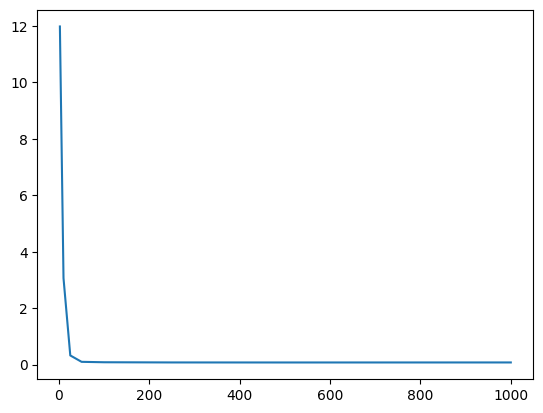

In [15]:
sns.lineplot(x = b_iterations, y = error3)

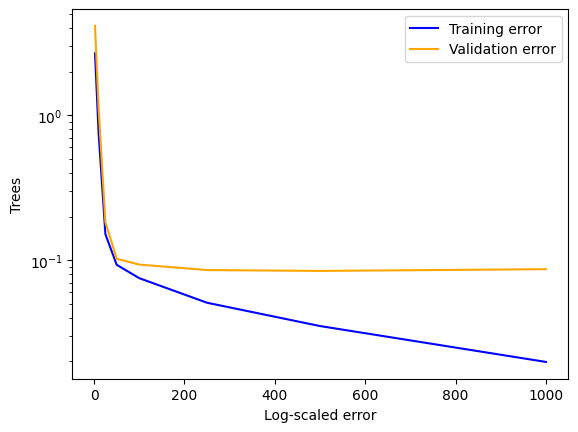

In [21]:
plt.plot(b_iterations, error1, "blue", label="Training error")
plt.plot(b_iterations, error2, "orange", label="Validation error" )
plt.yscale("log")
plt.xlabel("Log-scaled error")
plt.ylabel("Trees")
plt.legend()
plt.show()

5. Do you have evidence of overfitting to the training data set with 1,000 boosting iterations?
- There is no evidence of overfitting, but the model does not perform any better when the number of trees are increased.

6. Retrain the boosted regression tree using early stopping with a tolerance of 10. How many boosting iterations were optimal?
- The best number of iterations required is 24.

In [17]:
xgbr = xgb.XGBRegressor(n_estimators=25, 
                         learning_rate=0.1, early_stopping_rounds=10)
xgbr.fit(X_train_temp, y_train_temp, 
            eval_set=[(X_train_temp, y_train_temp), (X_val, y_val)]) 

[0]	validation_0-rmse:1.77921	validation_1-rmse:2.21433
[1]	validation_0-rmse:1.63615	validation_1-rmse:2.03436
[2]	validation_0-rmse:1.50558	validation_1-rmse:1.86969
[3]	validation_0-rmse:1.38656	validation_1-rmse:1.71940
[4]	validation_0-rmse:1.27810	validation_1-rmse:1.58212
[5]	validation_0-rmse:1.17907	validation_1-rmse:1.45677
[6]	validation_0-rmse:1.08911	validation_1-rmse:1.34261
[7]	validation_0-rmse:1.00741	validation_1-rmse:1.23838
[8]	validation_0-rmse:0.93335	validation_1-rmse:1.14378
[9]	validation_0-rmse:0.86616	validation_1-rmse:1.05749
[10]	validation_0-rmse:0.80528	validation_1-rmse:0.97894
[11]	validation_0-rmse:0.75004	validation_1-rmse:0.90750
[12]	validation_0-rmse:0.70035	validation_1-rmse:0.84272
[13]	validation_0-rmse:0.65523	validation_1-rmse:0.78387
[14]	validation_0-rmse:0.61482	validation_1-rmse:0.73080
[15]	validation_0-rmse:0.57804	validation_1-rmse:0.68266
[16]	validation_0-rmse:0.54530	validation_1-rmse:0.63944
[17]	validation_0-rmse:0.51645	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=25, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

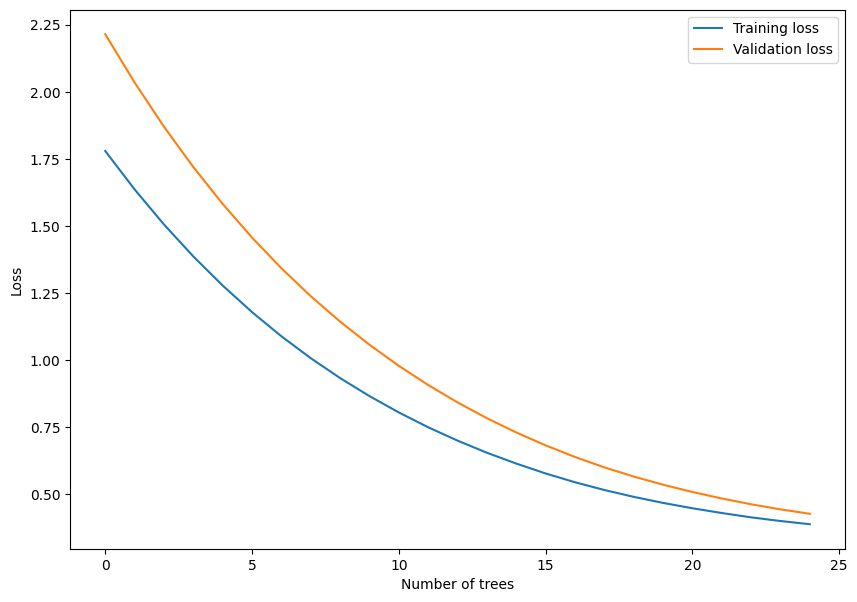

In [18]:
results = xgbr.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
#plt.axvline(21, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

In [19]:
xgbr.best_iteration

24